In [39]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

In [4]:
#check
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
X_iris, y_iris = iris.data, iris.target
print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


We'll try to predict Iris flowers species using only two attributes: sepal lenght and sepal width

### Training test split

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = X_iris[:, :2], y_iris #get two first attributes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 33)
print(X_train.shape, y_train.shape)

(112, 2) (112,)


### Standardize the features

In [7]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Plotting

Text(0, 0.5, 'Sepal width')

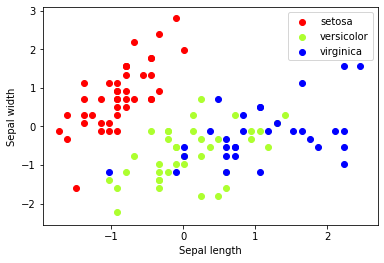

In [9]:
import matplotlib.pyplot as plt
colors = ['red', 'greenyellow', 'blue']
for i in range(len(colors)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

The separation between red dots and another dots is very clear. Lets build a model to predict if given dataset is a Setosa or not.

### Build a Model

In [10]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

Predict with a new value:

In [12]:
print (clf.predict(scaler.transform([[4.7, 3.1]])))

[0]


This is a Setosa specie

### Evaluating

In [14]:
#Training set
from sklearn import metrics
y_train_pred = clf.predict(X_train)
metrics.accuracy_score(y_train, y_train_pred)

0.8035714285714286

In [15]:
#Test set
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6842105263157895

In [18]:
print(metrics.classification_report(y_test, y_pred, target_names = iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.46      0.55      0.50        11
   virginica       0.71      0.63      0.67        19

    accuracy                           0.68        38
   macro avg       0.72      0.73      0.72        38
weighted avg       0.70      0.68      0.69        38



Our model is very good at predicting `setosa`, while suffers to separate the `versicolor` and `virginica`.

### Using cross-validation

In [25]:
from sklearn.model_selection import (cross_val_score, KFold)
from sklearn.pipeline import Pipeline

In [33]:
#create Pipeline
clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_model', SGDClassifier())
])

#create K-fold
cv = KFold(shuffle=True, random_state=33)

In [34]:
scores = cross_val_score(clf, X, y, cv=cv)
print(scores)

[0.66666667 0.7        0.6        0.86666667 0.7       ]


In [40]:
from scipy.stats import sem
def mean_score(scores):
    return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))
print (mean_score(scores))

Mean score: 0.707 (+/- 0.044)


our model has an average accuracy of 0.71